<H1> Entrainement de modèle de deep learing</H1>

## Chargement de la base de données


Pour charger des librairies dans python on utilise la fonction import.
On peut spécifier un alias pour utiliser les fonctions avec un nom plus court :

```import pandas as pd```

In [2]:
import pandas as pd
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
         'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
         'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names).replace('?', np.nan).dropna()


,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
df["class"] =df['class'].apply(lambda x: 0 if x == 2 else 1)
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Exploration des données


In [37]:
df.drop(['id'], axis=1, inplace=True)
print(df.describe())


KeyError: "['id'] not found in axis"

In [ ]:
# Plot histograms for each variable
df.hist(figsize=(10, 10));

## Séparation du jeu de données

Pour rappel, on garde un jeu de données de test pour valider notre algorithme à la fin

In [38]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X = df.drop(['class'], axis=1).to_numpy()
y = df['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Converting From Numpy Array To Torch Tensor

In [74]:
import torch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.tensor(y_train,dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test,dtype=torch.float32).reshape(-1, 1)

<ipython-input-74-7a79547ce101>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32).reshape(-1, 1)
<ipython-input-74-7a79547ce101>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test,dtype=torch.float32).reshape(-1, 1)


In [75]:
y_test.shape

torch.Size([137, 1])

In [108]:
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(9, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid())



In [77]:
print(model)

Sequential(
  (0): Linear(in_features=9, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [78]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(9, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=9, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [79]:
import torch.optim as optim
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [102]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.020261365920305252
Finished epoch 1, latest loss 0.02012450248003006
Finished epoch 2, latest loss 0.01994539052248001
Finished epoch 3, latest loss 0.01978156901896
Finished epoch 4, latest loss 0.019787020981311798
Finished epoch 5, latest loss 0.019606878980994225
Finished epoch 6, latest loss 0.01960035413503647
Finished epoch 7, latest loss 0.019450055435299873
Finished epoch 8, latest loss 0.019443117082118988
Finished epoch 9, latest loss 0.019336851313710213
Finished epoch 10, latest loss 0.019227389246225357
Finished epoch 11, latest loss 0.019312793388962746
Finished epoch 12, latest loss 0.019351104274392128
Finished epoch 13, latest loss 0.019364982843399048
Finished epoch 14, latest loss 0.019060442224144936
Finished epoch 15, latest loss 0.019239764660596848
Finished epoch 16, latest loss 0.01913236640393734
Finished epoch 17, latest loss 0.018996959552168846
Finished epoch 18, latest loss 0.019183935597538948
Finished epoch 19, latest loss

In [103]:
loss_fn(y_pred, ybatch)

tensor(0.0036, grad_fn=<BinaryCrossEntropyBackward0>)

## Evaluation du modèle

In [99]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X_train)

accuracy = (y_pred.round() == y_train).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.9835164546966553


## Evaluation du modèle sur le test

In [100]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X_test)

accuracy = (y_pred.round() == y_test).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.970802903175354


[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]])]

## Visualisation de la loss :



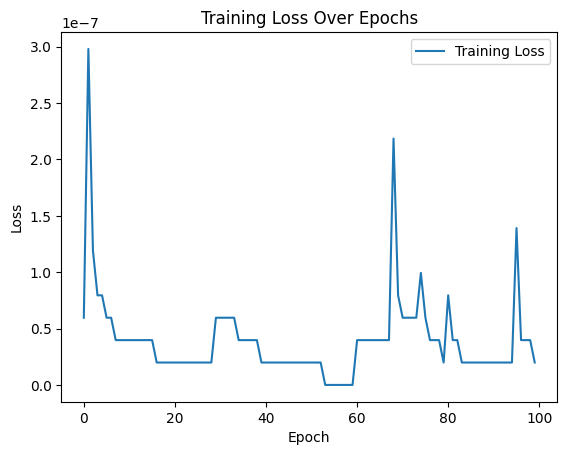

In [107]:
import matplotlib.pyplot as plt

n_epochs = 100
batch_size = 10

# Lists to store epoch and loss values
epoch_list = []
loss_list = []

for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Store epoch and loss values
    epoch_list.append(epoch)
    loss_list.append(loss.item())  # Convert loss tensor to scalar



# Plotting the loss graph
plt.plot(epoch_list, loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

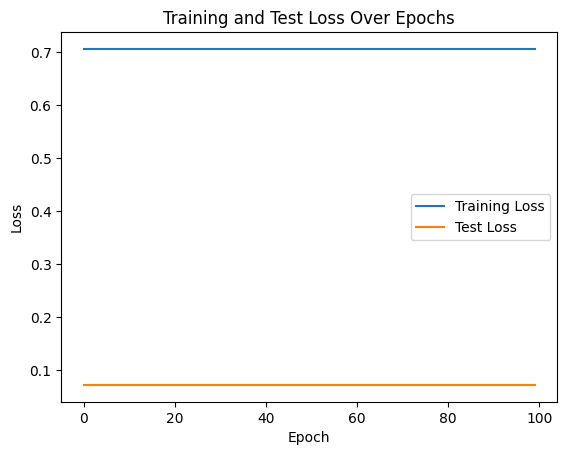

In [110]:
import matplotlib.pyplot as plt

n_epochs = 100
batch_size = 10

# Lists to store epoch, training loss, and test loss values
epoch_list = []
train_loss_list = []
test_loss_list = []

for epoch in range(n_epochs):
    # Training phase
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate training loss after the epoch
    train_loss = loss.item()

    # Testing phase
    test_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            Xbatch_test = X_test[i:i+batch_size]
            y_pred_test = model(Xbatch_test)
            ybatch_test = y_test[i:i+batch_size]
            loss_test = loss_fn(y_pred_test, ybatch_test)
            test_loss += loss_test.item()
    test_loss /= len(X_test)  # Average test loss

    # Store epoch, training loss, and test loss values
    epoch_list.append(epoch)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)



# Plotting the loss graph
plt.plot(epoch_list, train_loss_list, label='Training Loss')
plt.plot(epoch_list, test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

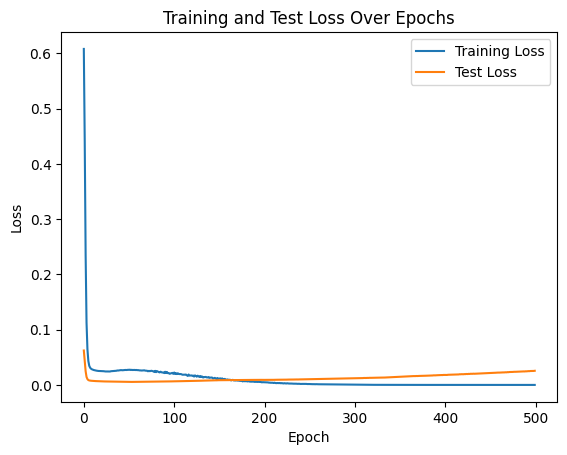

In [113]:
model = nn.Sequential(
    nn.Linear(9, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid())
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

import matplotlib.pyplot as plt

n_epochs = 500
batch_size = 10

# Lists to store epoch, training loss, and test loss values
epoch_list = []
train_loss_list = []
test_loss_list = []

for epoch in range(n_epochs):
    # Training phase
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate training loss after the epoch
    train_loss = loss.item()

    # Testing phase
    test_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            Xbatch_test = X_test[i:i+batch_size]
            y_pred_test = model(Xbatch_test)
            ybatch_test = y_test[i:i+batch_size]
            loss_test = loss_fn(y_pred_test, ybatch_test)
            test_loss += loss_test.item()
    test_loss /= len(X_test)  # Average test loss

    # Store epoch, training loss, and test loss values
    epoch_list.append(epoch)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)



# Plotting the loss graph
plt.plot(epoch_list, train_loss_list, label='Training Loss')
plt.plot(epoch_list, test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()


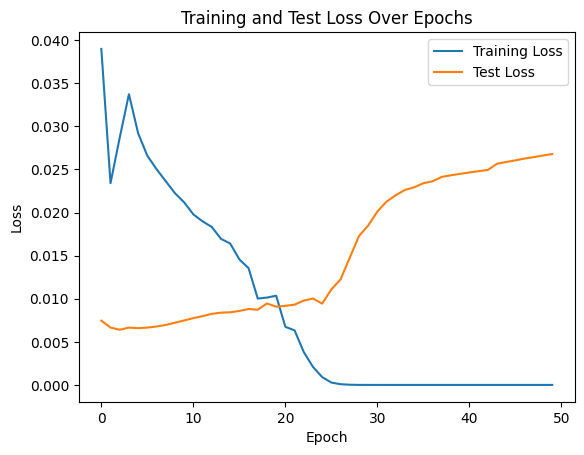

In [117]:
model = nn.Sequential(
    nn.Linear(9, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 64),

    nn.ReLU(),
    nn.Linear(64, 12),

    nn.ReLU(),
    nn.Linear(12, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),

    nn.Linear(8, 1),
    nn.Sigmoid())
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

import matplotlib.pyplot as plt

n_epochs = 50

batch_size = 10

# Lists to store epoch, training loss, and test loss values
epoch_list = []
train_loss_list = []
test_loss_list = []

for epoch in range(n_epochs):
    # Training phase
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate training loss after the epoch
    train_loss = loss.item()

    # Testing phase
    test_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            Xbatch_test = X_test[i:i+batch_size]
            y_pred_test = model(Xbatch_test)
            ybatch_test = y_test[i:i+batch_size]
            loss_test = loss_fn(y_pred_test, ybatch_test)
            test_loss += loss_test.item()
    test_loss /= len(X_test)  # Average test loss

    # Store epoch, training loss, and test loss values
    epoch_list.append(epoch)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)



# Plotting the loss graph
plt.plot(epoch_list, train_loss_list, label='Training Loss')
plt.plot(epoch_list, test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()


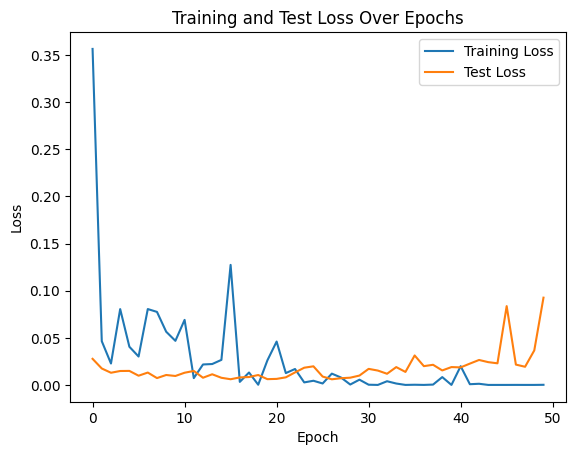

In [120]:
model = nn.Sequential(
    nn.Linear(9, 128),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(64, 12),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(12, 12),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Dropout(0.2),


    nn.Linear(8, 1),
    nn.Sigmoid())
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

import matplotlib.pyplot as plt

n_epochs = 50

batch_size = 10

# Lists to store epoch, training loss, and test loss values
epoch_list = []
train_loss_list = []
test_loss_list = []

for epoch in range(n_epochs):
    # Training phase
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate training loss after the epoch
    train_loss = loss.item()

    # Testing phase
    test_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            Xbatch_test = X_test[i:i+batch_size]
            y_pred_test = model(Xbatch_test)
            ybatch_test = y_test[i:i+batch_size]
            loss_test = loss_fn(y_pred_test, ybatch_test)
            test_loss += loss_test.item()
    test_loss /= len(X_test)  # Average test loss

    # Store epoch, training loss, and test loss values
    epoch_list.append(epoch)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)



# Plotting the loss graph
plt.plot(epoch_list, train_loss_list, label='Training Loss')
plt.plot(epoch_list, test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()
